# Punto 1 - Regresión Lineal

Se utiliza la librería ```scipy.optimize``` y la función ```minimize``` para intentar encontrar los parámetros óptimos que minimizan el error cuadrático medio de una aproximación lineal a un conjunto discreto de puntos suministrados previamente.

La fórmula de la función de error cuadrático medio que queremos minimizar está dada por el siguiente problema de Programación Cuadrática:
$$\min_{a,b}\left[\frac{1}{8}\sum_{i=1}^{8}(y_i-(at_i+b))^2\right]$$

In [ ]:
from scipy.optimize import minimize
import numpy as np
import time

# Crear las secuencias de datos a aproximar con la regresión lineal
t = [1,2,3,4,5,7,8,10]
y = [4/2,6/2,9,12,11,15,15,22]

# Definir la función del error a minimizar
def error_regresion(params, t, y):
  a,b = params
  error = 0
  for i in range(len(t)):
    error += (y[i]-(a*t[i]+b))**2
  return (1/len(t))*error

# Ejecutar la regresión con la función minimize
start1 = time.time()
res_cg = minimize(fun=error_regresion, x0=(0,0), args=(t,y), method="CG", options={'disp':True})
end1 = time.time()
tiempo_cg = end1-start1
print("\nMétodo CG:")
print("Los parámetros que mejor aproximan la recta son [a b] = " + str(res_cg.x) + ", que da un error de " + str(res_cg.fun))
print("Tomó un tiempo de " + str(tiempo_cg) + " s\n")

start2 = time.time()
res_bfgs = minimize(fun=error_regresion, x0=(0,0), args=(t,y), method="BFGS", options={'disp':True})
end2 = time.time()
tiempo_bfgs = end2-start2
print("\nMétodo BFGS:")
print("Los parámetros que mejor aproximan la recta son [a b] = " + str(res_bfgs.x) + ", que da un error de " + str(res_bfgs.fun))
print("Tomó un tiempo de " + str(tiempo_bfgs) + " s\n")

start3 = time.time()
res_nm = minimize(fun=error_regresion, x0=(0,0), args=(t,y), method="Nelder-mead", options={'disp':True})
end3 = time.time()
tiempo_nm = end3-start3
print("\nMétodo Nelder-Mead:")
print("Los parámetros que mejor aproximan la recta son [a b] = " + str(res_nm.x) + ", que da un error de " + str(res_nm.fun))
print("Tomó un tiempo de " + str(tiempo_nm) + " s\n")

Optimization terminated successfully.
         Current function value: 2.852022
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5

Método CG:
Los parámetros que mejor aproximan la recta son [a b] = [2.02941146 0.97794303], que da un error de 2.8520220588244216
Tomó un tiempo de 0.01047205924987793 s

Optimization terminated successfully.
         Current function value: 2.852022
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6

Método BFGS:
Los parámetros que mejor aproximan la recta son [a b] = [2.02941174 0.9779413 ], que da un error de 2.8520220588235343
Tomó un tiempo de 0.013654232025146484 s

Optimization terminated successfully.
         Current function value: 2.852022
         Iterations: 69
         Function evaluations: 128

Método Nelder-Mead:
Los parámetros que mejor aproximan la recta son [a b] = [2.02940734 0.97794702], que da un error de 2.852022059254287
Tomó un tiempo de 0.044281482696533

Con respecto a la eficiencia de cada uno de los métodos aplicados por el algoritmo, podemos resumir el tiempo que tomó correr cada uno contra el número de iteraciones, de la siguiente manera:

|Algoritmo|Iteraciones|Tiempo Total|Tiempo por Iteración|
|-|-|-|-|
|CG|2|0.010472 s|0.005236 s|
|BFGS|5|0.013654 s|0.002731 s|
|Nelder-Mead|69|0.044282 s|0.000642 s|

De esta manera, en términos de la eficiencia del método de solución, podemos ordenar del más eficiente al menos eficiente:

1. Nelder-Mead
2. BFGS
3. CG

La eficiencia de los métodos también se puede deber a cómo calculan los gradientes o las otras herramientas matemáticas parciales para generar el siguiente paso de iteración. Por ejemplo, según los valores que imprime la ejecución de la función en cada método, podemos ver que el CG evalúa la función 15 veces y el gradiente 5 veces; por otro lado, el BFGS evalúa la función 18 veces y el gradiente 6 veces; finalmente, el método Nelder-Mead sólo evalúa la función 128 veces, pero nunca evalúa el gradiente. Por eso, podríamos suponer que emplea aproximaciones por fuerza bruta sin requerir derivar nunca la función. Probablemente en ese radica su eficiencia, si bien tarda más tiempo en total para acabar, cada iteración individual se ejecuta más rápido.

En ese orden de ideas, el uso o selección del método de resolución debería basarse en aspectos como por ejemplo, la memoria disponible, la cantidad de recursos habilitados por el procesador o la velocidad neta requerida. En el caso del problema suministrado en este laboratorio, cualquiera de los tres métodos retornan parámetros muy similares en tiempos reducidos (globalmente menos de 1 segundo), por lo cual cualquiera podría utilizarse sin mayor inconveniente o diferencia.

Cabe resaltar también que, en vista de que un computador emplea recursos compartidos de manera concurrente, no siempre se va a tardar lo mismo para cada método pues el procesador empleado para hacer los cálculos puede cambiar de contexto o quedarse colgado en recursos. Sin embargo, en promedio, siempre va a correr en intervalos de tiempo similares, por lo que la eficiencia de los métodos debería ser relativamente similar.

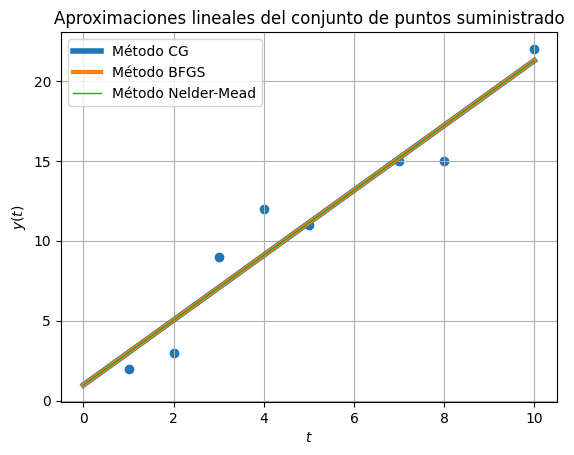

In [ ]:
import matplotlib.pyplot as plt

# Graficar el conjunto discreto de puntos en el plano
plt.scatter(t,y,marker='o')
# Graficar las rectas generadas por cada método
x_fun = np.linspace(0, 10, 100)
y_cg = res_cg.x[0]*x_fun + res_cg.x[1]
y_bfgs = res_bfgs.x[0]*x_fun + res_bfgs.x[1]
y_nm = res_nm.x[0]*x_fun + res_nm.x[1]

plt.plot(x_fun, y_cg, linewidth=4, label="Método CG")
plt.plot(x_fun, y_bfgs, linewidth=3, label="Método BFGS")
plt.plot(x_fun, y_nm, linewidth=1, label="Método Nelder-Mead")

# Añadir leyenda y etiquetas de los ejes
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.title("Aproximaciones lineales del conjunto de puntos suministrado")
plt.grid()

# Mostrar el gráfico
plt.show()

# Punto 2. Problema de optimización no lineal

Las variables de decisión utilizadas son: $X_{1}$, $X_{2}$ y $X_{3}$.

$$min\ f(x) = x_{1}^2+2x_{2}^2+x_{3}^2+2(x_{1}-500)+2(x_{2}-500)+2(x_{1}-500)$$
$$sujeto\ a$$
$$x_{1}+x_{2}+x_{3} \geq 1500$$
$$x_{1} \geq 500$$
$$x_{2}\geq 500-(x_{1}-500)$$
$$x_{3} \geq 500-(x_{1}-500)-(x_{2}-500)$$

Vale la pena aclarar que las restricciones hacen referencia a la cantidad de producto sobrante del periodo anterior para satisfacer la demanda del periodo actual.

De esta manera, se utiliza el método de optimización “SLSQP” de la librería scipy.optimize.minimize.

In [4]:
import numpy as np
from scipy.optimize import minimize

# Definimos la función objetivo
def objective(x):
    return x[0]**2 + 2*x[1]**2 + x[2]**2 + 2*(x[0]-500) + 2*(x[1]-500) + 2*(x[0]-500)

# Definimos las restricciones
def constraint1(x):
    return x[0] + x[1] + x[2] - 1500

def constraint2(x):
    return x[0] - 500

def constraint3(x):
    return x[1] - 500 + (x[0]-500)

def constraint4(x):
    return x[2] - 500 + (x[0]-500) + (x[1]-500)

# Valores iniciales
x0 = [500, 500, 500]

# Definimos las restricciones como un diccionario
constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3},
               {'type': 'ineq', 'fun': constraint4}]

# Llamamos a la función minimize con el método SLSQP
solution = minimize(objective, x0, method='SLSQP', constraints=constraints)

# Imprimimos los resultados
print('Estado de la optimización:', solution.success)
print('Mensaje:', solution.message)
print('Valor de la función objetivo en el mínimo:', solution.fun)
print('Valores óptimos de las variables:', solution.x)


Estado de la optimización: True
Mensaje: Optimization terminated successfully
Valor de la función objetivo en el mínimo: 916999.667633435
Valores óptimos de las variables: [666.33333275 333.66666783 500.00000019]


La solución hallada fue:
- $x_{1} = 666.33$
- $x_{2} = 333.66$
- $x_{3} = 500$

Los cuales, representan el número de velas producidas en cada mes. De esta manera, solamente para el mes 1 tendremos un costo asociado al almacenamiento de 166.33 velas, las cuales, serán utilizadas en el mes 2. Por otro lado, el valor de la función objetivo es: $916,999.